In [124]:
#import packages and functions
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [125]:
# Load the datasets
netflix = pd.read_csv('netflix_titles.csv')

imdb = pd.read_csv('imdb_top_1000.csv')






##(1) Identify numerical and categorical features in your dataset and list them out with their ranges and category values.

#### Separate numerical and categorical features from Netflix and IMDb datasets, and print the range of each numerical feature in Netflix.


In [126]:
# netflix feature / range extraction

netflix_numeric = netflix.select_dtypes(include=['int64', 'float64'])
netflix_categorical = imdb.select_dtypes(include=['object', 'category'])

print("Netflix Numerical Features with Ranges:")
for col in netflix_numeric.columns:
    print(f"{col} range: {netflix_numeric[col].min()} to {netflix_numeric[col].max()}")
#imdb
imdb_numeric = imdb.select_dtypes(include=['int64', 'float64'])
imdb_categorical = imdb.select_dtypes(include=['object'])





Netflix Numerical Features with Ranges:
release_year range: 1925 to 2021


##(2) Show an example of each of the following single feature plots on your dataset. Explain the results of each plot

#### shows the fequency of titles released in each year

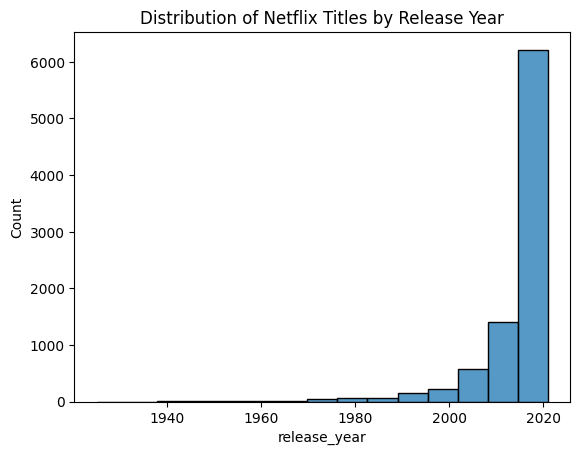

In [127]:

sns.histplot(netflix, x='release_year', bins=15)
plt.title("Distribution of Netflix Titles by Release Year")
plt.show()

####this density plot shows the probability density of differnt ratings

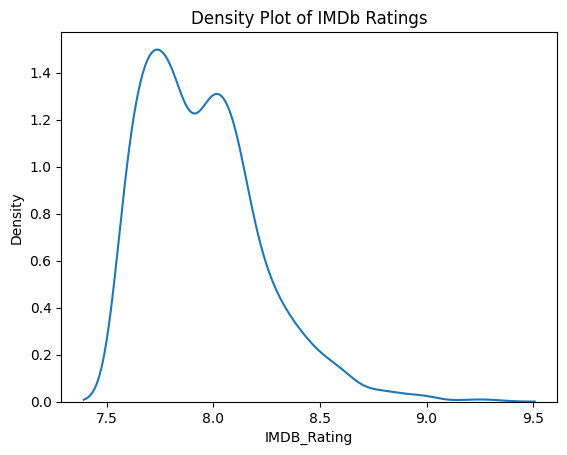

In [128]:

sns.kdeplot(imdb, x='IMDB_Rating')
plt.title("Density Plot of IMDb Ratings")
plt.show()

#### counts how many titles belong to a particular rating category

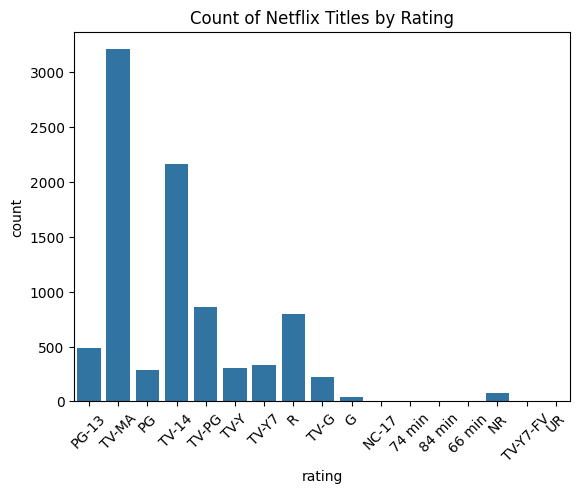

In [129]:

sns.countplot(netflix, x='rating')
plt.title("Count of Netflix Titles by Rating")
plt.xticks(rotation=45)
plt.show()

#### displays the spread of IMDb ratings

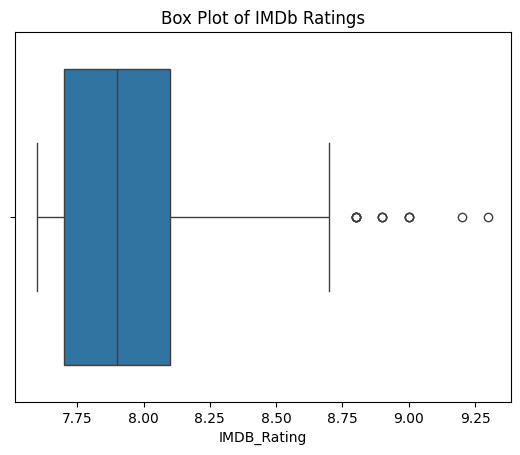

In [130]:

sns.boxplot(imdb, x='IMDB_Rating')
plt.title("Box Plot of IMDb Ratings")
plt.show()

#### This violin plot illustrates where rating are most concentrated

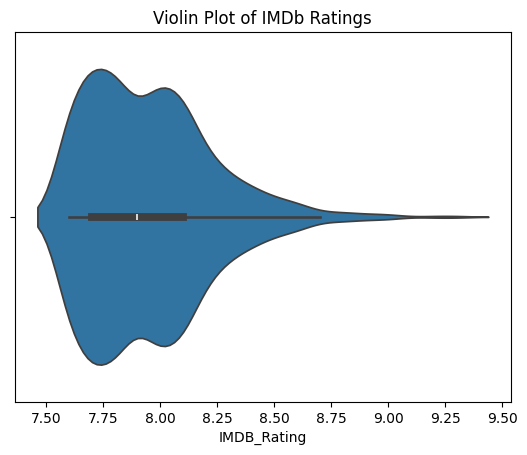

In [131]:

sns.violinplot(imdb, x='IMDB_Rating')
plt.title("Violin Plot of IMDb Ratings")
plt.show()

#(3) Show an example of each of the following two feature plots on the  dataset. Use hue, style, and size parameters  as well.  Explain the results of each plot briefly.

#### scatter plot thaat shows the relationship between IMDb ratings and the number of votes

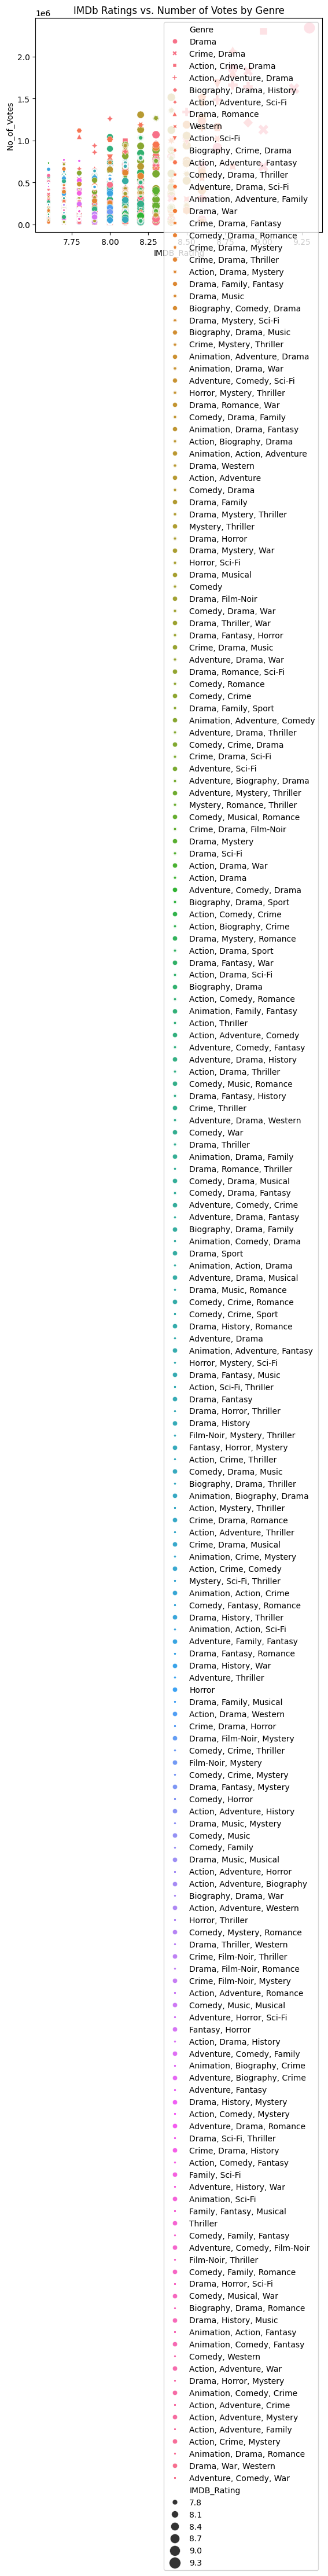

In [132]:

sns.scatterplot(data=imdb, x='IMDB_Rating', y='No_of_Votes', hue='Genre', style='Genre', size='IMDB_Rating', sizes=(20, 200))
plt.title("IMDb Ratings vs. Number of Votes by Genre")
plt.show()


##(4) Summarize the dataset using the following methods.

#### Returns the dimesions of the dataset

In [133]:

print("Netflix Dimesions:", netflix.shape)
print("IMDb Dimensions:", imdb.shape)

Netflix Dimesions: (8807, 12)
IMDb Dimensions: (1000, 16)


#### Gives a summary of the datafram incluidng column names, data tupes, and number of non-null calues of each column

In [134]:

netflix.info()
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Ti

####provides summary of stats for each feautre: includes numerical and categorical features

In [135]:

netflix.describe(include="all")
imdb.describe(include="all")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


##(5) Show examples of the following visualization methods on selected dataset columns. Try to interpret the results that are interesting and useful.

##### Histogram shows how rating are distrubuted across top-rated movies

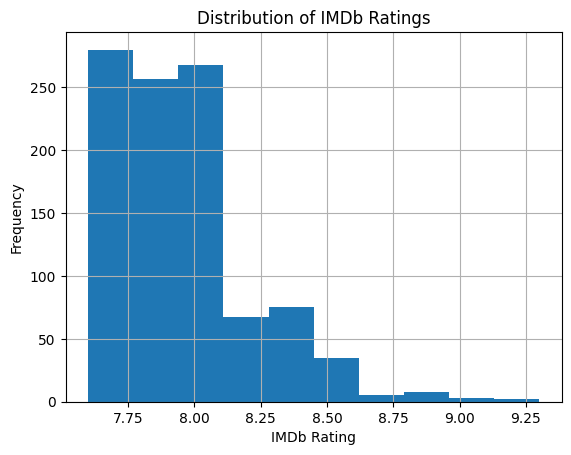

In [136]:

imdb['IMDB_Rating'].hist(bins=10)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.show()

####This histogram of IMDb ratings shows how ratings are distributed across top-rated movies. High ratings raking around 8–9 might indicate that highly rated movies are overrepresented in the top 1000 movies, which aligns with the dataset’s focus.

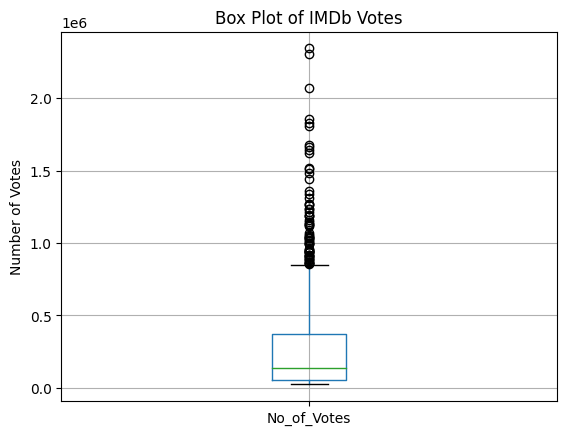

In [137]:

imdb.boxplot(column=['No_of_Votes'])
plt.title("Box Plot of IMDb Votes")
plt.ylabel("Number of Votes")
plt.show()

####This box plot shows the distribution of votes for IMDb top-rated movies. A wide range with outliers could indicate that a few movies have received a significantly higher number of votes, suggesting higher popularity or cult status.

#### Box plot shows the distrubution of votes of IMDb rop rated movies

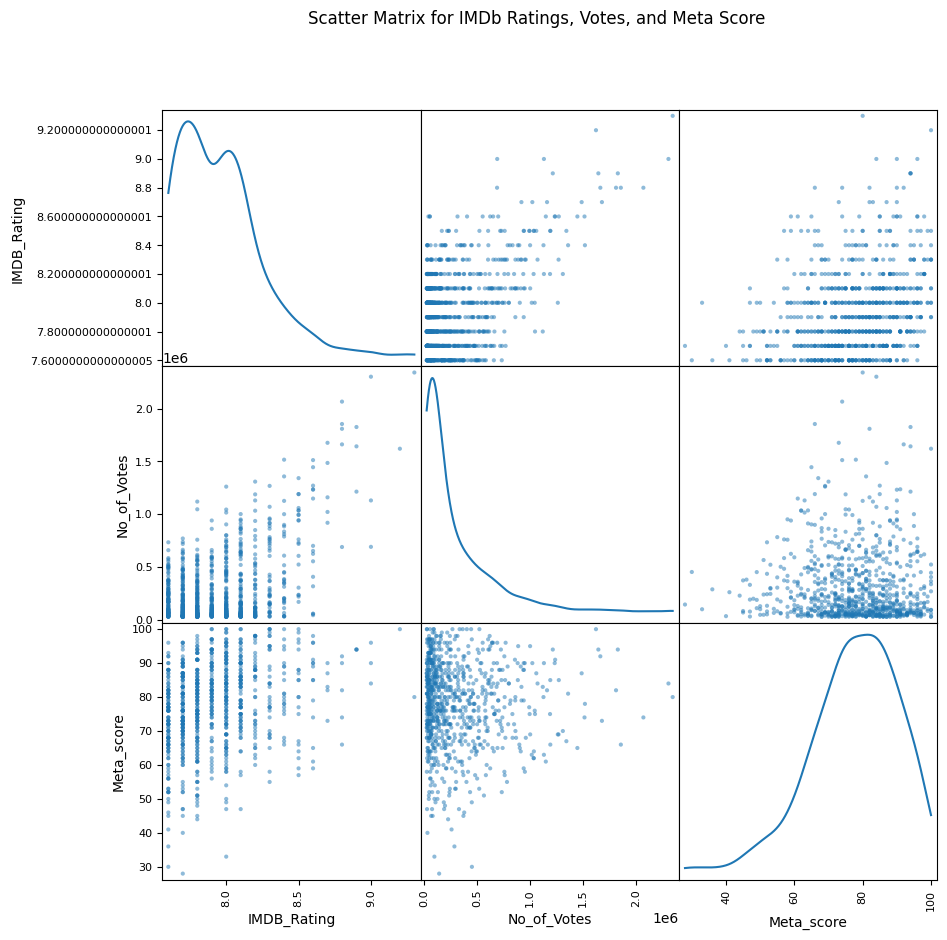

In [138]:
# scatter matrix reveals
pd.plotting.scatter_matrix(imdb[['IMDB_Rating', 'No_of_Votes', 'Meta_score']], figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix for IMDb Ratings, Votes, and Meta Score")
plt.show()

#### The scatter matrix reveals pairwise relationships between IMDB_Rating, No_of_Votes, and Meta_score. like:
A positive correlation between IMDB_Rating and Meta_score could indicate that IMDb ratings often align with critical reviews.
Distribution patterns within histograms on the diagonal provide additional insights into each feature's spread.

##(6)Try to find outliers in the dataset such as the following, show examples, and show how you are cleaning them.

#####Using box plot and IQR to identify outliers

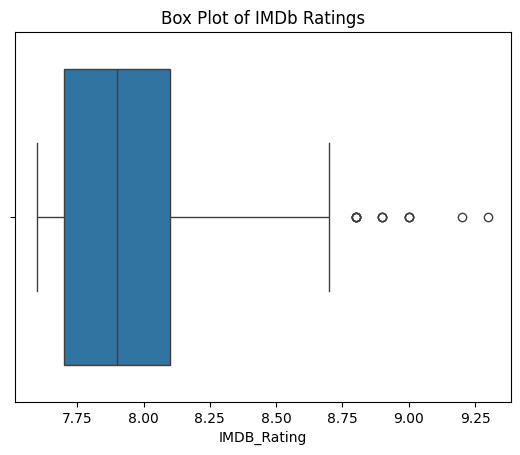

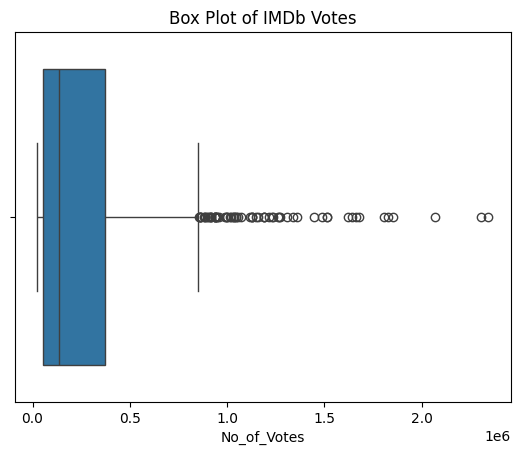

In [139]:

sns.boxplot(data=imdb, x='IMDB_Rating')
plt.title("Box Plot of IMDb Ratings")
plt.show()

sns.boxplot(data=imdb, x='No_of_Votes')
plt.title("Box Plot of IMDb Votes")
plt.show()

##### Function to identify and remove outliers based on IQR

In [140]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

# Removing outliers from 'IMDB_Rating' and 'No_of_Votes'
imdb_cleaned = remove_outliers_iqr(imdb, 'IMDB_Rating')
imdb_cleaned = remove_outliers_iqr(imdb_cleaned, 'No_of_Votes')

# Checking results
print("Original IMDb data shape:", imdb.shape)
print("Cleaned IMDb data shape:", imdb_cleaned.shape)

Original IMDb data shape: (1000, 16)
Cleaned IMDb data shape: (928, 16)


####'''Outliers in IMDB_Rating and No_of_Votes were removed.
If there were any extreme values, this would reduce the dataset's
 rows, as seen by the change in shape.
 Removing outliers like excessively high vote counts can prevent these
  points from skewing the model’s understanding of popular or highly rated movies.'''